<a href="https://colab.research.google.com/github/sashavlasits/Data-Science/blob/main/Unit5/SashVlasU5proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import arviz as az
import xarray as xr
import pymc as pm
from scipy.interpolate import PchipInterpolator

##Context

As we have previously established, the Olympics are a multinational, multidisciplinary, multilingual, multi-billion-dollar, multifarious, quadrennial sporting event. This analysis will be a continuation of the last installment of the Sasha M Vlasits data science extravaganza in that it will also focus on all of the athletes from all of the olympic games ever (or at least a sample of them). This time, I will be trying to use athlete height to predict sport, using basketball and gymnastics. This will be a significant analysis because it will allow us to take a give person and tell us whether they would be suited to being an olympic gymnast or basketball player, based on their height.

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("heesoo37/120-years-of-olympic-history-athletes-and-results")

print("Path to dataset files:", path)

100%|██████████| 5.43M/5.43M [00:00<00:00, 23.9MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/heesoo37/120-years-of-olympic-history-athletes-and-results/versions/2


In [3]:
#my bestie gememeimei helped me do this
import os
import pandas as pd

# List files in the downloaded path
files_in_path = os.listdir(path)
print("Files in dataset path:", files_in_path)

# Assuming the main dataset is 'athlete_events.csv'
# If there are multiple CSVs, the user might need to specify which one
df = pd.read_csv(os.path.join(path, 'athlete_events.csv'))

display(df.head())

Files in dataset path: ['athlete_events.csv', 'noc_regions.csv']


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [4]:
athlete1 = df.query("Sport in ['Basketball', 'Gymnastics']")
athlete1

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
41,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold
43,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Floor Exercise,NaN
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270915,135481,"Jules Alexis ""Louis"" Zutter",M,30.0,NaN,NaN,Switzerland,SUI,1896 Summer,1896,Summer,Athina,Gymnastics,Gymnastics Men's Parallel Bars,Silver
270916,135481,"Jules Alexis ""Louis"" Zutter",M,30.0,NaN,NaN,Switzerland,SUI,1896 Summer,1896,Summer,Athina,Gymnastics,Gymnastics Men's Horizontal Bar,NaN
270917,135481,"Jules Alexis ""Louis"" Zutter",M,30.0,NaN,NaN,Switzerland,SUI,1896 Summer,1896,Summer,Athina,Gymnastics,Gymnastics Men's Pommelled Horse,Gold
271026,135530,Philip Zwiener,M,23.0,202.0,98.0,Germany,GER,2008 Summer,2008,Summer,Beijing,Basketball,Basketball Men's Basketball,NaN


In [5]:
athlete = athlete1.query("Sex == 'F'")
athlete

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
167,69,Tamara Abalde Daz,F,19.0,185.0,72.0,Spain,ESP,2008 Summer,2008,Summer,Beijing,Basketball,Basketball Women's Basketball,NaN
676,394,Irene Abel,F,19.0,160.0,48.0,East Germany,GDR,1972 Summer,1972,Summer,Munich,Gymnastics,Gymnastics Women's Individual All-Around,NaN
677,394,Irene Abel,F,19.0,160.0,48.0,East Germany,GDR,1972 Summer,1972,Summer,Munich,Gymnastics,Gymnastics Women's Team All-Around,Silver
678,394,Irene Abel,F,19.0,160.0,48.0,East Germany,GDR,1972 Summer,1972,Summer,Munich,Gymnastics,Gymnastics Women's Floor Exercise,NaN
679,394,Irene Abel,F,19.0,160.0,48.0,East Germany,GDR,1972 Summer,1972,Summer,Munich,Gymnastics,Gymnastics Women's Horse Vault,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270908,135479,Tanja uti (-Kober),F,25.0,NaN,NaN,Yugoslavia,YUG,1952 Summer,1952,Summer,Helsinki,Gymnastics,Gymnastics Women's Floor Exercise,NaN
270909,135479,Tanja uti (-Kober),F,25.0,NaN,NaN,Yugoslavia,YUG,1952 Summer,1952,Summer,Helsinki,Gymnastics,Gymnastics Women's Horse Vault,NaN
270910,135479,Tanja uti (-Kober),F,25.0,NaN,NaN,Yugoslavia,YUG,1952 Summer,1952,Summer,Helsinki,Gymnastics,Gymnastics Women's Uneven Bars,NaN
270911,135479,Tanja uti (-Kober),F,25.0,NaN,NaN,Yugoslavia,YUG,1952 Summer,1952,Summer,Helsinki,Gymnastics,Gymnastics Women's Balance Beam,NaN


In [6]:
#gemeni helped me figure out how to drop the duplicates

athlete_subset_duplicates = athlete.drop_duplicates(subset=['Name']) # Based on 'col1'

athlete_yay = athlete_subset_duplicates.drop_duplicates(keep='last')

athlete_yay

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
167,69,Tamara Abalde Daz,F,19.0,185.0,72.0,Spain,ESP,2008 Summer,2008,Summer,Beijing,Basketball,Basketball Women's Basketball,NaN
676,394,Irene Abel,F,19.0,160.0,48.0,East Germany,GDR,1972 Summer,1972,Summer,Munich,Gymnastics,Gymnastics Women's Individual All-Around,NaN
687,396,Katja Abel,F,25.0,165.0,55.0,Germany,GER,2008 Summer,2008,Summer,Beijing,Gymnastics,Gymnastics Women's Individual All-Around,NaN
705,403,Ruth Abeles,F,18.0,153.0,48.0,Israel,ISR,1960 Summer,1960,Summer,Roma,Gymnastics,Gymnastics Women's Individual All-Around,NaN
1034,580,Svetlana Olegovna Abrosimova,F,20.0,188.0,77.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Basketball,Basketball Women's Basketball,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270421,135265,Gigi Zosa,F,16.0,155.0,44.0,Canada,CAN,1984 Summer,1984,Summer,Los Angeles,Gymnastics,Gymnastics Women's Individual All-Around,NaN
270522,135299,Michaela Zrstov,F,25.0,186.0,74.0,Czech Republic,CZE,2012 Summer,2012,Summer,London,Basketball,Basketball Women's Basketball,NaN
270695,135379,Erika Zuchold (Barth-),F,21.0,158.0,48.0,East Germany,GDR,1968 Summer,1968,Summer,Mexico City,Gymnastics,Gymnastics Women's Individual All-Around,NaN
270904,135479,Tanja uti (-Kober),F,21.0,NaN,NaN,Yugoslavia,YUG,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Women's Team All-Around,NaN


In [7]:
athlete_yay2 = athlete_yay.dropna()
athlete_yay2

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
1863,1023,"Adriana ""Adrianinha"" Moiss Pinto",F,21.0,170.0,65.0,Brazil,BRA,2000 Summer,2000,Summer,Sydney,Basketball,Basketball Women's Basketball,Bronze
4457,2546,Alessandra dos Santos de Oliveira,F,22.0,200.0,85.0,Brazil,BRA,1996 Summer,1996,Summer,Atlanta,Basketball,Basketball Women's Basketball,Silver
5823,3281,Simona Amnar (-Tabr),F,16.0,158.0,44.0,Romania,ROU,1996 Summer,1996,Summer,Atlanta,Gymnastics,Gymnastics Women's Individual All-Around,Bronze
8927,4897,Anelija Arbutina (-arenac),F,21.0,178.0,68.0,Yugoslavia,YUG,1988 Summer,1988,Summer,Seoul,Basketball,Basketball Women's Basketball,Silver
10928,5971,Seimone Delicia Augustus,F,24.0,183.0,74.0,United States,USA,2008 Summer,2008,Summer,Beijing,Basketball,Basketball Women's Basketball,Gold
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268776,134468,Zhang Hui,F,24.0,169.0,65.0,China,CHN,1984 Summer,1984,Summer,Los Angeles,Basketball,Basketball Women's Basketball,Bronze
268874,134524,Zhang Nan,F,18.0,148.0,39.0,China,CHN,2004 Summer,2004,Summer,Athina,Gymnastics,Gymnastics Women's Individual All-Around,Bronze
269043,134614,Zhang Yueqin,F,24.0,180.0,76.0,China,CHN,1984 Summer,1984,Summer,Los Angeles,Basketball,Basketball Women's Basketball,Bronze
269242,134727,Zheng Dongmei,F,24.0,173.0,60.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Women's Basketball,Silver


In [8]:
column_Height = athlete_yay2['Height']
mean_Height = athlete_yay2['Height'].mean()
print(f"\nMean of Height: {mean_Height}")


Mean of Height: 179.17666666666668


##Data

We return to the kaggle dataset of mysterious providence once again for our delightful data. According to the creator, the data was taken from the official Olympics website, but I do not really want to verify that claim, so I shan't. It includes lots of fun categories, but I will only be concentrating on sport played and athlete height. For the purposes of the model, I used a query to isolate only basketball players and gymnasts. I also made it so it would only include female players to control for the height difference between men and women that occurs regardless of sport. Then I removed all the NaNs so everything wouldn't break. Finally I removed any duplicate athletes that resulted from the same athlete competing in multiple olympicses. This was also nice because it got us down from over 200,000 data points to only about 300, so yay! Also, using help from gemeni I found that the mean height of the data set is about 179 cm or 5' 10.5"

In [9]:
yayathlete = athlete_yay2.query("Sport == ('Basketball', 'Gymnastics')")

athlete_codes = pd.Categorical(yayathlete["Sport"]).codes

#makes a numpy array of the sepal length values
Sport2 = yayathlete.Height.values

#here I normalize the sepal length values.
#This makes it easier for pymc to process
Sport_diff = Sport2 - Sport2.mean()

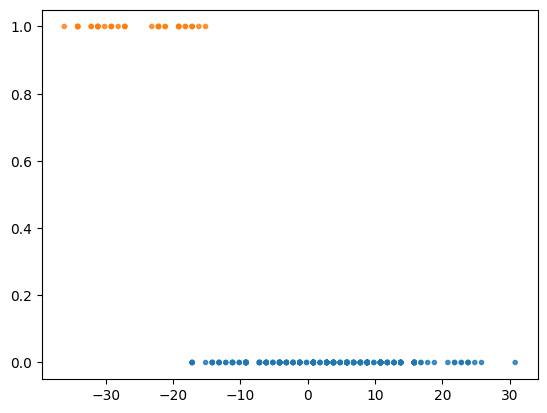

In [10]:
plt.scatter(Sport_diff, athlete_codes, marker=".", color=[f"C{x}" for x in athlete_codes], alpha = .8)

##Data Visualization

This scatter plot shows the difference from the mean height of every data point, as well as classifying them as either zero or one depending on their sport, with orange being gymnasts and blue being basketball players. This shows us the approximate cutoff point that we can use to categorize someone as one sport or the other. From a quick glance I would estimate this as being around -15 centimeters from the mean. Given that the mean is about 179 cm, this cutoff point would be 164cm or about 5'4.5".

In [ ]:
with pm.Model() as model_athleteyayy:

    α = pm.Normal("α", mu=0, sigma=1)
    β = pm.Normal("β", mu=0, sigma=5)

    #linear part of the model
    μ = α + Sport_diff * β

    #the linear part, mu, is transformed via a sigmoid curve
    θ = pm.Deterministic("θ", pm.math.sigmoid(μ))

    #this lets our model find a boudary value
    #which allows us to do classificiation
    #It is not neccesary for the model to run
    bd = pm.Deterministic("bd", -α / β)

    #likelihood
    y = pm.Bernoulli("y", p=θ, observed=athlete_codes)

    idata_yay = pm.sample()

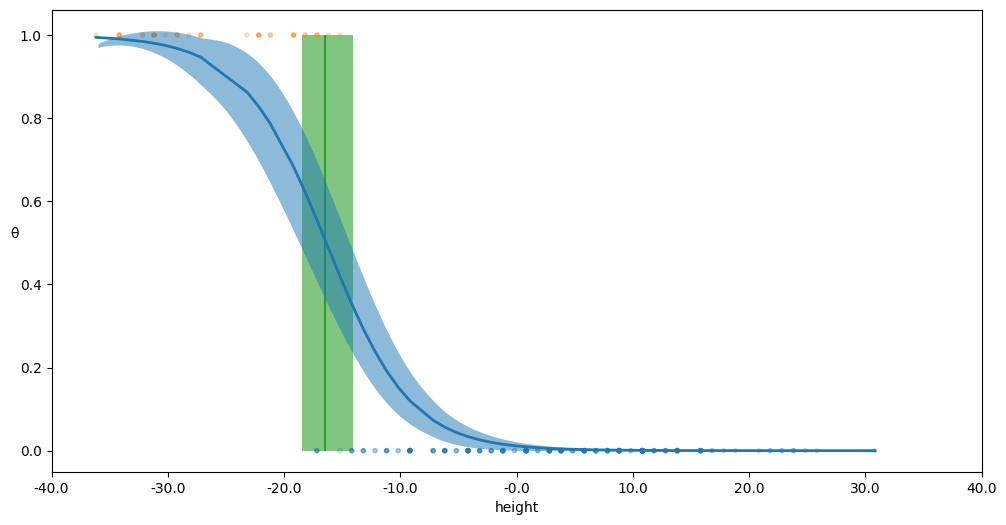

In [12]:
posterior = idata_yay.posterior
theta = posterior["θ"].mean(("chain", "draw"))

#this will help us tanslate from the standardized data back to the raw data
idx = np.argsort(Sport_diff)

#set up the plot
_, ax = plt.subplots(figsize=(12, 6))

#plot the posterior
ax.plot(Sport_diff[idx], theta[idx], color="C0", lw=2)
ax.vlines(posterior["bd"].mean(("chain", "draw")), 0, 1, color="C2", zorder=0)

#bd for boundary
#these two lines plot our boundary or decision line, which is what we could use
#to predict the sepcies of a flower using sepal length
bd_hdi = az.hdi(posterior["bd"])
ax.fill_betweenx([0, 1], bd_hdi["bd"][0], bd_hdi["bd"][1], color="C2", alpha=0.6, lw=0)

#scatter plot of raw data
ax.scatter(Sport_diff, athlete_codes, marker=".", color=[f"C{x}" for x in athlete_codes], alpha = 0.2)

#plots the sigmoid regression
az.plot_hdi(Sport_diff, posterior["θ"], color="C0", ax=ax, fill_kwargs={"lw": 0})

#labels
ax.set_xlabel('height')
ax.set_ylabel("θ", rotation=0)

# # use original scale for xticks
locs, _ = plt.xticks()
ax.set_xticks(locs, np.round(locs + Sport_diff.mean(), 1))

##Posterior

This visualization of the posterior shows a pretty similar trend to that I expected to see based on the original scatterplot. The green line does put the cutoff point at a little lower than I estimated, but my guess was still within the margin of error, so I'll take it. This does suggest that the cutoff is more like 5'3" or so, which is interesting.

In [ ]:
pm.sample_posterior_predictive(
    idata_yay, model = model_athleteyayy, extend_inferencedata=True
    )

Text(0, 0.5, 'Sport')

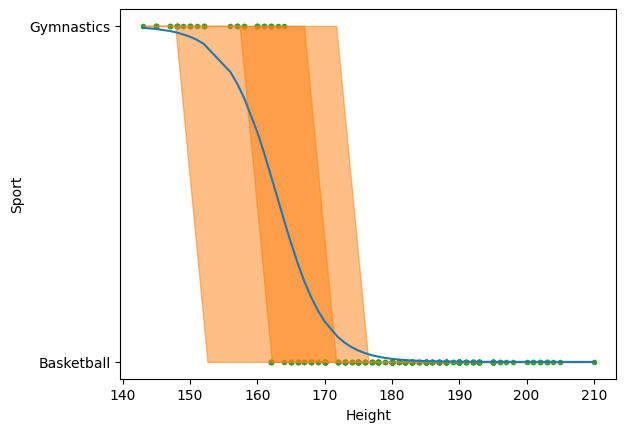

In [21]:
mean_line = idata_yay.posterior["θ"].mean(("chain", "draw"))

#creates some x values to run through our line formula
YAY = np.random.normal(athlete_yay2.Height.values, 0.01)
idx = np.argsort(YAY)
x = np.linspace(YAY.min(), YAY.max(), 15)

#grabs the 94% HDI and 50% HDI, and sets them up for graphing.
y_pred_q = idata_yay.posterior_predictive["y"].quantile(
    [0.03, 0.97, 0.25, 0.75], dim=["chain", "draw"]
)
y_hat_bounds = iter(
    [
        PchipInterpolator(YAY[idx], y_pred_q[i][idx])(x)
        for i in range(4)
    ]
)

#plots raw data and our line of best fit
_, ax = plt.subplots()
ax.plot(athlete_yay2.Height, athlete_yay2.Sport, "C2.", zorder=-3)
ax.plot(YAY[idx], mean_line[idx], c="C0")


#graphs the 94% and 50% HDIs
for lb, ub in zip(y_hat_bounds, y_hat_bounds):
    ax.fill_between(x, lb, ub, color="C1", alpha=0.5)

#labels
ax.set_xlabel("Height")
ax.set_ylabel("Sport")

<Axes: xlabel='y'>

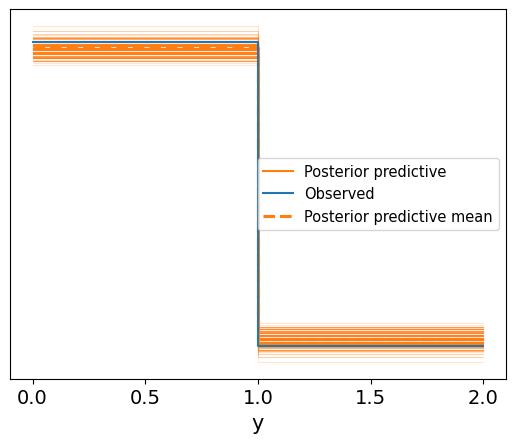

In [22]:
az.plot_ppc(idata_yay, num_pp_samples=200, colors=["C1", "C0", "C1"])

##Conclusion

The posterior predictive check shows a larger range for our cutoff point, but my original guess is still there, so we can assume that it's probably somewhere in the 5'3" to 5'7" range. The above component of the check shows that my model is pretty okay, matching the curve of the data pretty well. However, this model does not account for the fact that there were more basketball players represented in the data than gymnasts, which potentially skewed my results. Future analysis with more complete data might try to fix that issue and potentially look at the cutoff for men as well as women.